# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [147]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [148]:
# Define the col names for the iris dataset
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Flower']

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from URL
iris_df = pd.read_csv(url, header=None, names=col_names)
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width       Flower
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [149]:
print(iris_df)



     sepal_length  sepal_width  petal_length  petal_width          Flower
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [150]:
print(iris_df.shape)



(150, 5)


In [151]:
print(iris_df.columns)



Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Flower'], dtype='object')


2. Drop rows with any missing values


In [152]:
# iris_df.dropna(inplace=True)
print(iris_df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Flower'], dtype='object')


3. Encoding the class label categorical column: from string to num


c:\Users\LFCA_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


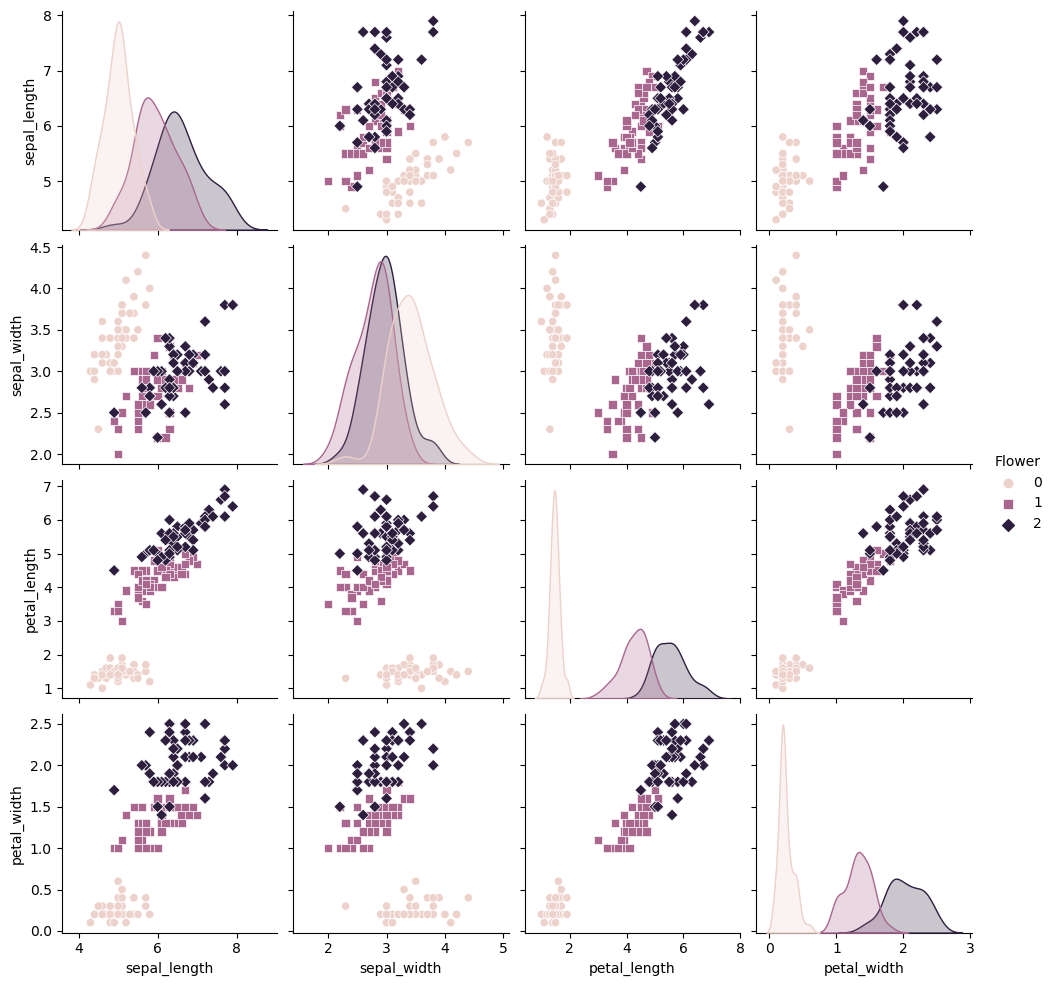

In [153]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
iris_df['Flower'] = iris_df['Flower'].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

# Visualize the dataset
sns.pairplot(iris_df, hue='Flower', markers=["o", "s", "D"])
plt.show()


Now the label/category is numeric


4. Discard columns that won't be used


In [154]:
# Drop out non necessary columns
# iris_df.drop(columns=['sepal_width'], inplace=True)
# print(iris_df.head())



5. Scatter plot of the data

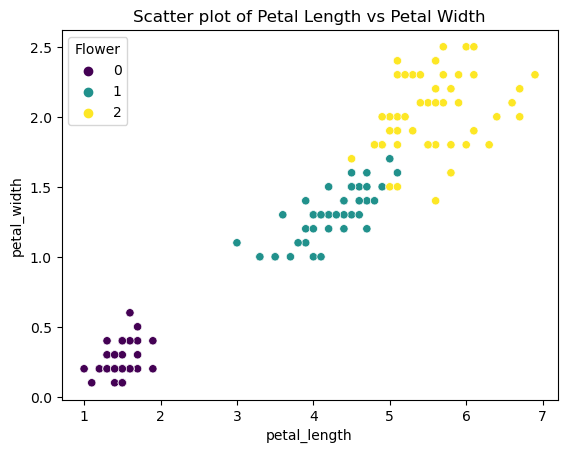

In [155]:
sns.scatterplot(data=iris_df, x='petal_length', y='petal_width', hue='Flower', palette='viridis')
plt.title('Scatter plot of Petal Length vs Petal Width')
plt.show()




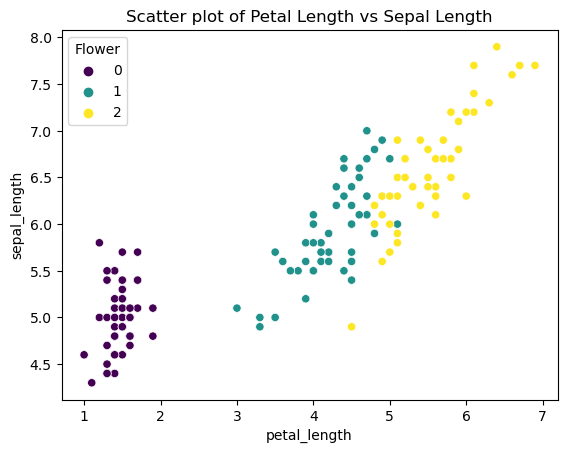

In [156]:
sns.scatterplot(data=iris_df, x='petal_length', y='sepal_length', hue='Flower', palette='viridis')
plt.title('Scatter plot of Petal Length vs Sepal Length')
plt.show()




In [157]:
# Scatter plot of Sepal_Length vs Sepal_Width





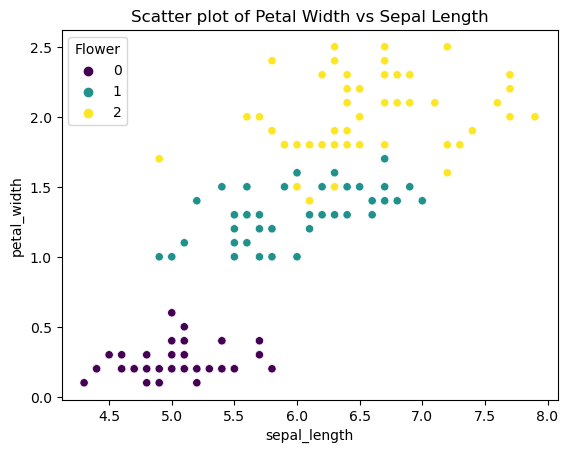

In [158]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_width', hue='Flower', palette='viridis')
plt.title('Scatter plot of Petal Width vs Sepal Length')
plt.show()




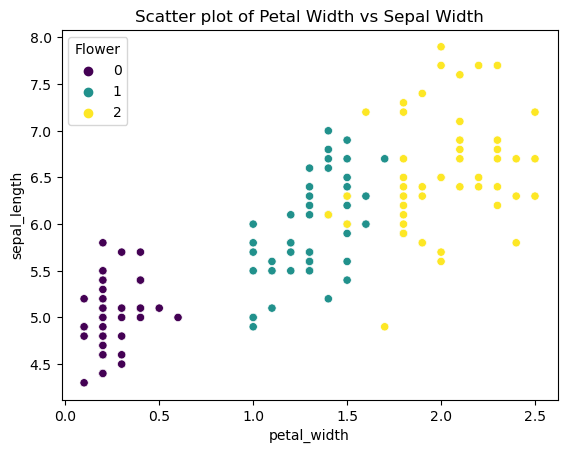

In [159]:
sns.scatterplot(data=iris_df, x='petal_width', y='sepal_length', hue='Flower', palette='viridis')
plt.title('Scatter plot of Petal Width vs Sepal Width')
plt.show()




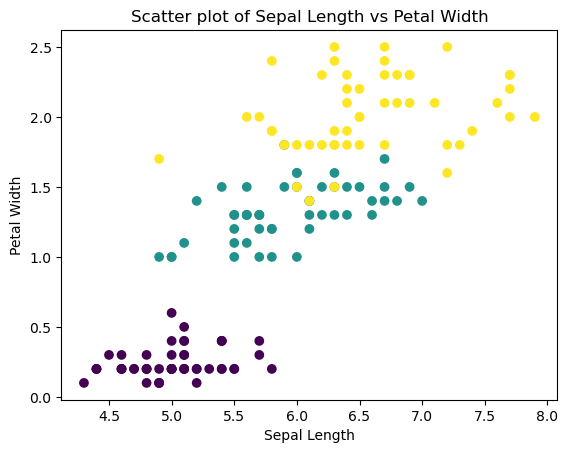

In [160]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(iris_df['sepal_length'], iris_df['petal_width'], c=iris_df['Flower'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot of Sepal Length vs Petal Width')
plt.show()




c:\Users\LFCA_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


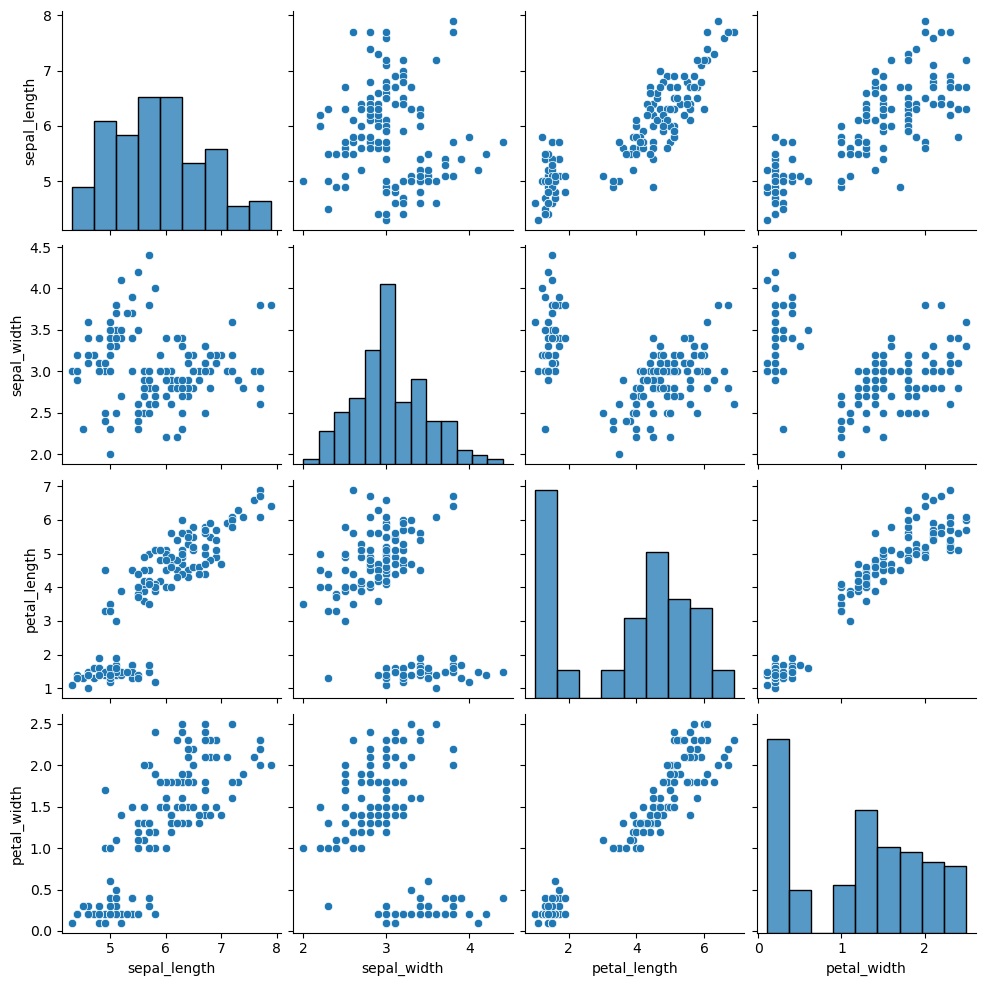

In [161]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(iris_df.drop(columns=['Flower']))
plt.show()




c:\Users\LFCA_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


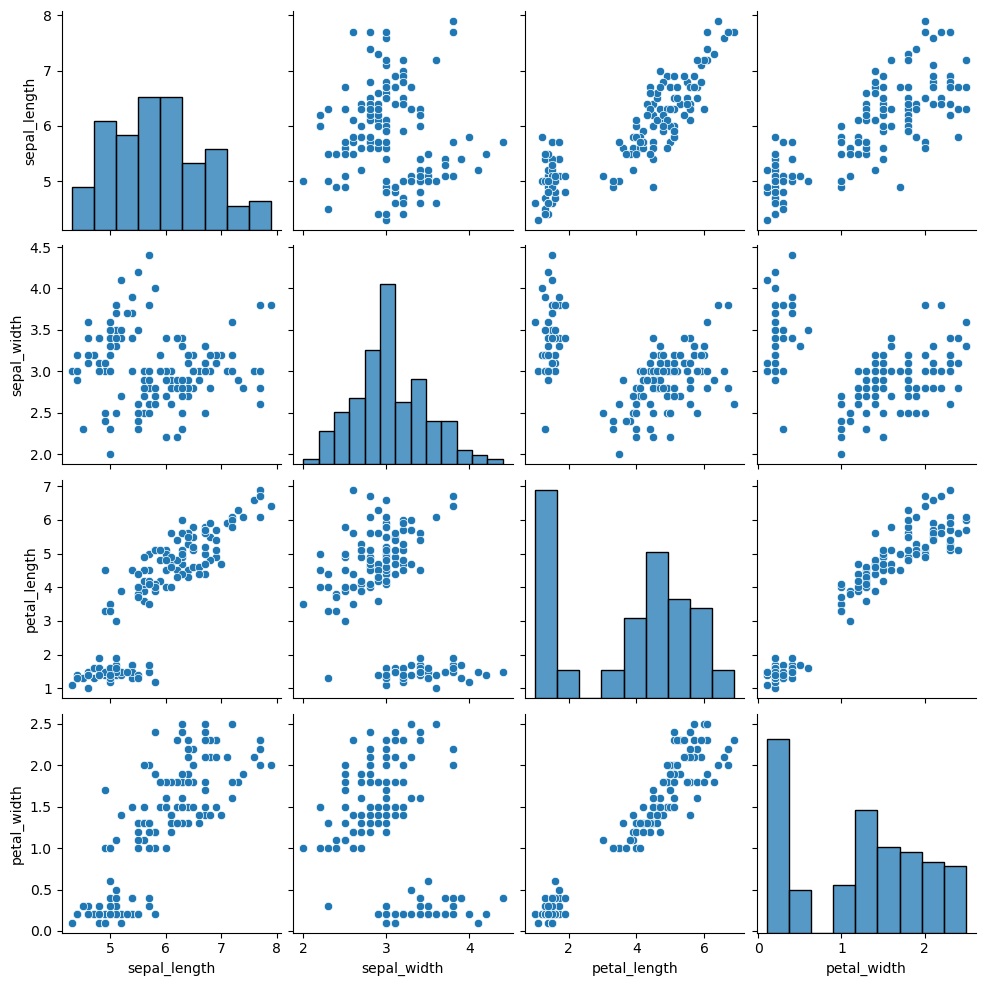

In [162]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(iris_df.drop(columns=['Flower']))
plt.show()




6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [163]:
# Get dataframes for each real cluster
cluster_0 = iris_df[iris_df['Flower'] == 0]
cluster_1 = iris_df[iris_df['Flower'] == 1]
cluster_2 = iris_df[iris_df['Flower'] == 2]

print("Cluster 0:\n", cluster_0.head())
print("Cluster 1:\n", cluster_1.head())
print("Cluster 2:\n", cluster_2.head())



Cluster 0:
    sepal_length  sepal_width  petal_length  petal_width  Flower
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0
Cluster 1:
     sepal_length  sepal_width  petal_length  petal_width  Flower
50           7.0          3.2           4.7          1.4       1
51           6.4          3.2           4.5          1.5       1
52           6.9          3.1           4.9          1.5       1
53           5.5          2.3           4.0          1.3       1
54           6.5          2.8           4.6          1.5       1
Cluster 2:
      sepal_length  sepal_width  petal_length  petal_width  Flower
100           6.3          3.3           6.0          2.5       2
101           5.8          2.7           5.1          1.9 

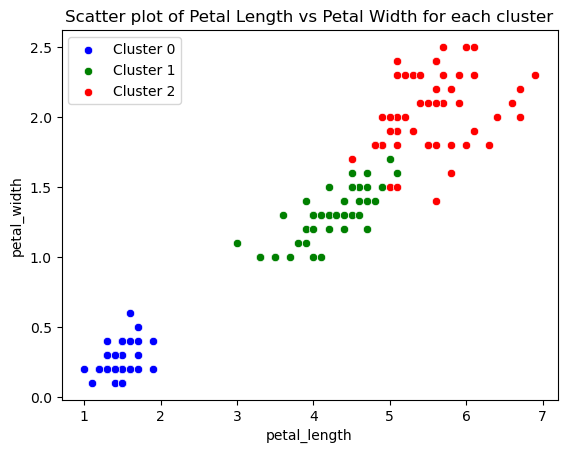

In [164]:
# Scatter plot for cluster 0
sns.scatterplot(data=cluster_0, x='petal_length', y='petal_width', label='Cluster 0', color='blue')

# Scatter plot for cluster 1
sns.scatterplot(data=cluster_1, x='petal_length', y='petal_width', label='Cluster 1', color='green')

# Scatter plot for cluster 2
sns.scatterplot(data=cluster_2, x='petal_length', y='petal_width', label='Cluster 2', color='red')

plt.title('Scatter plot of Petal Length vs Petal Width for each cluster')
plt.legend()
plt.show()




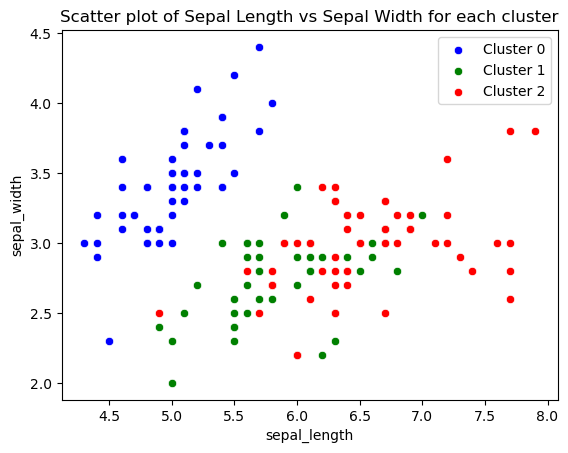

In [165]:
# Scatter plot for cluster 0
sns.scatterplot(data=cluster_0, x='sepal_length', y='sepal_width', label='Cluster 0', color='blue')

# Scatter plot for cluster 1
sns.scatterplot(data=cluster_1, x='sepal_length', y='sepal_width', label='Cluster 1', color='green')

# Scatter plot for cluster 2
sns.scatterplot(data=cluster_2, x='sepal_length', y='sepal_width', label='Cluster 2', color='red')

plt.title('Scatter plot of Sepal Length vs Sepal Width for each cluster')
plt.legend()
plt.show()




Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [166]:
# Select variables (one, two, three, four)
X  = iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
#X  = iris_df[["petal_length", "petal_width"]].values
#X  = iris_df[["sepal_length", "sepal_width"]].values

# Get the class of each observation
y  = iris_df["Flower"].values


In [167]:
# Understand the data X
print(X.shape)
print(X[:5])



(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [168]:
# Understand the data y
print(y.shape)
print(y[:5])

(150,)
[0 0 0 0 0]


In [169]:
num_observations = iris_df.shape[0]
print(f"Number of observations in the dataset: {num_observations}")



Number of observations in the dataset: 150


In [170]:
# Calculate the number of observations for class 0

num_class_0 = len(cluster_0)
print(f"Number of observations for class 0: {num_class_0}")

Number of observations for class 0: 50


In [171]:
# Calculate the number of observations for class 1
num_class_1 = len(cluster_1)
print(f"Number of observations for class 1: {num_class_1}")


Number of observations for class 1: 50


In [172]:
# Calculate the number of observations for class 2
num_class_2 = len(cluster_2)
print(f"Number of observations for class 2: {num_class_2}")


Number of observations for class 2: 50


# Train a classifier

## Train the classification model

In [173]:
from sklearn.linear_model import LogisticRegression

# Import sklearn linear_model

# Initialize the classifier

# Fit the model to the training data

# Initialize the classifier
classifier = LogisticRegression()

# Fit the model to the training data
classifier.fit(X, y)

LogisticRegression()

## Predict the class of a new observation

In [174]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew


array([[5.5, 3.5, 1.5, 0.5]])

In [175]:
# Define the new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])

# Make the prediction using xnew

# Get the predicted class
predicted_class = classifier.predict(xnew)
print(f"The predicted class for the new observation is: {predicted_class[0]}")

The predicted class for the new observation is: 0


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [176]:
from sklearn.model_selection import train_test_split

# Import sklearn train_test_split


# Split data in train and test sets

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [177]:
# Number of observations in the train set
num_train_observations = X_train.shape[0]
print(f"Number of observations in the train set: {num_train_observations}")


Number of observations in the train set: 15


In [178]:
# Number of observations of each class in the train set

num_class_0_train = sum(y_train == 0)
num_class_1_train = sum(y_train == 1)
num_class_2_train = sum(y_train == 2)

print(f"Number of observations for class 0 in the train set: {num_class_0_train}")
print(f"Number of observations for class 1 in the train set: {num_class_1_train}")
print(f"Number of observations for class 2 in the train set: {num_class_2_train}")

Number of observations for class 0 in the train set: 2
Number of observations for class 1 in the train set: 6
Number of observations for class 2 in the train set: 7


In [179]:
# Number of observations in the test set
num_test_observations = X_test.shape[0]
print(f"Number of observations in the test set: {num_test_observations}")


Number of observations in the test set: 135


In [180]:
# Number of observations of each class in the test set
num_class_0_test = sum(y_test == 0)
num_class_1_test = sum(y_test == 1)
num_class_2_test = sum(y_test == 2)

print(f"Number of observations for class 0 in the test set: {num_class_0_test}")
print(f"Number of observations for class 1 in the test set: {num_class_1_test}")
print(f"Number of observations for class 2 in the test set: {num_class_2_test}")


Number of observations for class 0 in the test set: 48
Number of observations for class 1 in the test set: 44
Number of observations for class 2 in the test set: 43


## Train the classification model

In [181]:
# Initialize the classifier


# Fit the model to the training data

classifier.fit(X_train, y_train)

LogisticRegression()

## Test the classification model

In [182]:
# Make the predictions using the test set
y_pred = classifier.predict(X_test)



In [183]:
# Explore real and predicted labels
# Explore real and predicted labels
comparison_df = pd.DataFrame({'Real Label': y_test, 'Predicted Label': y_pred})
print(comparison_df.head())


   Real Label  Predicted Label
0           1                1
1           0                0
2           2                2
3           1                1
4           1                1


## Compute the acurracy

In [184]:
from sklearn.metrics import accuracy_score

# Define a function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)


In [185]:
# Calculate total accuracy

total_accuracy = compute_accuracy(y_test, y_pred)
print(f"Total accuracy of the classifier: {total_accuracy}")



Total accuracy of the classifier: 0.9481481481481482


In [186]:
# Calculate total accuracy using sklearn.metrics
total_accuracy = accuracy_score(y_test, y_pred)
print(f"Total accuracy of the classifier: {total_accuracy}")


Total accuracy of the classifier: 0.9481481481481482


In [187]:
# Compute accuracy for class 0
class_0_indices = (y_test == 0)
class_0_accuracy = accuracy_score(y_test[class_0_indices], y_pred[class_0_indices])
print(f"Accuracy for class 0: {class_0_accuracy}")

Accuracy for class 0: 1.0


In [188]:
# Compute accuracy for class 1

class_1_indices = (y_test == 1)
class_1_accuracy = accuracy_score(y_test[class_1_indices], y_pred[class_1_indices])
print(f"Accuracy for class 1: {class_1_accuracy}")

Accuracy for class 1: 0.8409090909090909


In [189]:
# Compute accuracy for class 2
class_2_indices = (y_test == 2)
class_2_accuracy = accuracy_score(y_test[class_2_indices], y_pred[class_2_indices])
print(f"Accuracy for class 2: {class_2_accuracy}")




Accuracy for class 2: 1.0


## Confussion matrix

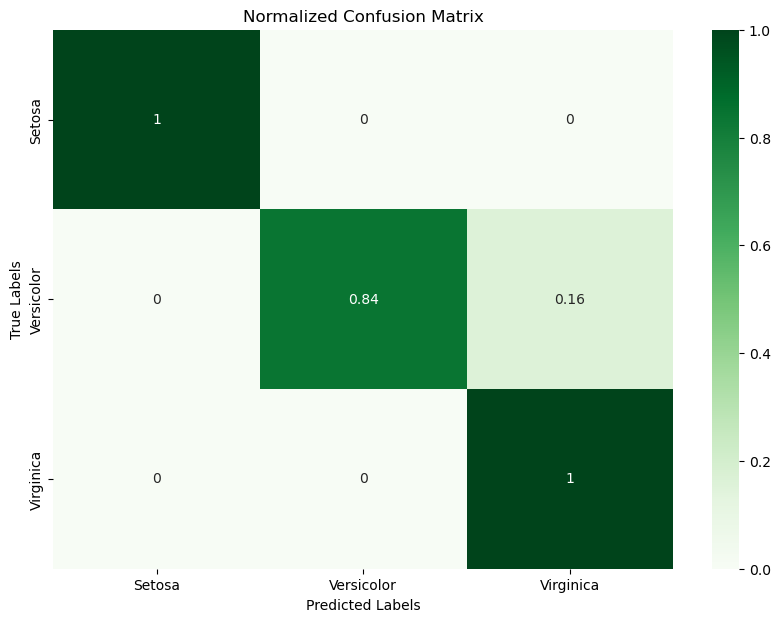

In [199]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confussion matrix (normalized confusion matrix)
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')


# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

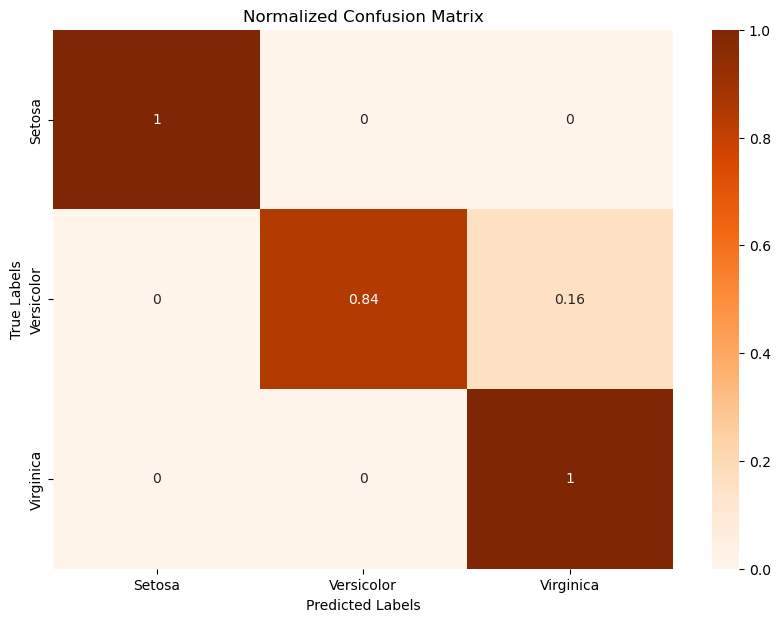

In [202]:
# Plot normalized confussion matrix

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Oranges', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()


# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy? The two Petal variables


2) Using the four variables, try with two classifiers. Which provides the best performance? Decision Tree Classifier provides the best performance.

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to train and evaluate the classifier
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# (a) Using the four variables
X_four = iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
accuracy_four = train_and_evaluate(X_four, y)
print(f"Accuracy using the four variables: {accuracy_four}")

# (b) Using the two Petal variables
X_petal = iris_df[["petal_length", "petal_width"]].values
accuracy_petal = train_and_evaluate(X_petal, y)
print(f"Accuracy using the two Petal variables: {accuracy_petal}")

# (c) Using the two Sepal variables
X_sepal = iris_df[["sepal_length", "sepal_width"]].values
accuracy_sepal = train_and_evaluate(X_sepal, y)
print(f"Accuracy using the two Sepal variables: {accuracy_sepal}")

# Determine which set of variables provides the best classification accuracy
best_accuracy = max(accuracy_four, accuracy_petal, accuracy_sepal)
if best_accuracy == accuracy_four:
    print("The four variables provide the best classification accuracy.")
elif best_accuracy == accuracy_petal:
    print("The two Petal variables provide the best classification accuracy.")
else:
    print("The two Sepal variables provide the best classification accuracy.")

Accuracy using the four variables: 0.9481481481481482
Accuracy using the two Petal variables: 0.9629629629629629
Accuracy using the two Sepal variables: 0.6296296296296297
The two Petal variables provide the best classification accuracy.


In [207]:
from sklearn.tree import DecisionTreeClassifier

# Function to train and evaluate the classifier
def train_and_evaluate_classifier(classifier, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Using Logistic Regression
logistic_classifier = LogisticRegression()
accuracy_logistic = train_and_evaluate_classifier(logistic_classifier, X_four, y)
print(f"Accuracy using Logistic Regression: {accuracy_logistic}")

# Using Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
accuracy_decision_tree = train_and_evaluate_classifier(decision_tree_classifier, X_four, y)
print(f"Accuracy using Decision Tree Classifier: {accuracy_decision_tree}")

# Determine which classifier provides the best performance
best_classifier_accuracy = max(accuracy_logistic, accuracy_decision_tree)
if best_classifier_accuracy == accuracy_logistic:
    print("Logistic Regression provides the best performance.")
else:
    print("Decision Tree Classifier provides the best performance.")

Accuracy using Logistic Regression: 0.9481481481481482
Accuracy using Decision Tree Classifier: 0.9555555555555556
Decision Tree Classifier provides the best performance.
